In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read CSV
trial_csv = pd.read_csv("Resources/clinicaltrial_data.csv")
drug_csv = pd.read_csv("Resources/mouse_drug_data.csv")

In [3]:
combine_data = trial_csv.merge(drug_csv,on='Mouse ID',how='outer')
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
group_drug = combine_data.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']
group_drug_df = pd.DataFrame(group_drug)
group_drug_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
#why this one works and _df does not work?
#sem = standard error of mean. reliability of data. this case 89%
group_drug_df['Sem'] = group_drug.sem(axis=None,skipna=None,level=None, ddof=1, numeric_only=None)
group_drug_df.sort_values(['Tumor Volume (mm3)'],ascending=True).head()

,,Tumor Volume (mm3),Sem
Drug,Timepoint,,
Ramicane,45,34.955595,0.898067
Capomulin,45,36.236114,0.898067
Ramicane,40,36.574081,0.898067
Capomulin,40,36.958001,0.898067
Ramicane,35,37.451996,0.898067


In [6]:
group_drug_pivot = group_drug_df.pivot_table(values='Tumor Volume (mm3)',index='Timepoint', columns='Drug')
group_drug_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:
group_drug_sem = group_drug_df.pivot_table(index='Timepoint',columns='Drug',values='Sem')  
group_drug_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
5,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
10,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
15,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
20,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
25,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
30,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
35,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
40,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067


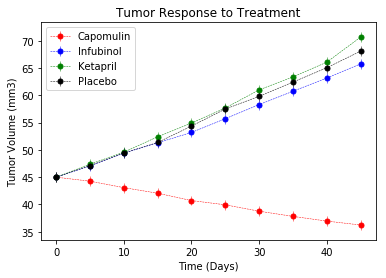

In [23]:
plt.errorbar(group_drug_pivot.index, group_drug_pivot['Capomulin'], yerr=group_drug_sem['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(group_drug_pivot.index, group_drug_pivot['Infubinol'], yerr=group_drug_sem['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(group_drug_pivot.index, group_drug_pivot['Ketapril'], yerr=group_drug_sem['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(group_drug_pivot.index, group_drug_pivot['Placebo'], yerr=group_drug_sem['Placebo'],
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

x_lim = len(group_drug_sem.index)
# Chart title
plt.title("Tumor Response to Treatment")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Tumor Volume (mm3)")
# legend 
plt.legend(loc='upper left')
plt.show()

In [9]:
Met_data = combine_data.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']
Met_data_df = pd.DataFrame(Met_data)
Met_data_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
Met_data_df['Sem'] = Met_data.sem(axis=None,skipna=None,level=None, ddof=1, numeric_only=None)
Met_data_df.head()

Metastatic Sites       Sem
Drug      Timepoint                            
Capomulin 0                  0.000000  0.090044
          5                  0.160000  0.090044
          10                 0.320000  0.090044
          15                 0.375000  0.090044
          20                 0.652174  0.090044

In [11]:
Meta_data_pivot = Met_data_df.pivot_table(values='Metastatic Sites',index='Timepoint', columns='Drug')
Meta_data_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [12]:
Mouse_data = combine_data.groupby(['Drug','Timepoint']).count()['Mouse ID']
Mouse_data_df = pd.DataFrame(Mouse_data)
Mouse_data_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [17]:
Mouse_data_pivot = Mouse_data_df.pivot_table(values='Mouse ID',index='Timepoint', columns='Drug')
Mouse_data_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


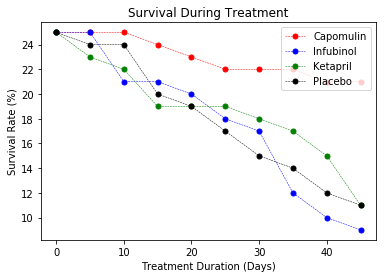

In [20]:
# Create scatter plot to show the survival rate of mice through the course of treatment
plt.errorbar(Mouse_data_pivot.index, Mouse_data_pivot['Capomulin'], 
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(Mouse_data_pivot.index, Mouse_data_pivot['Infubinol'], 
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(Mouse_data_pivot.index, Mouse_data_pivot['Ketapril'], 
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(Mouse_data_pivot.index, Mouse_data_pivot['Placebo'], 
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

# Chart title
plt.title("Survival During Treatment")
# x label
plt.xlabel("Treatment Duration (Days)")
# y label
plt.ylabel("Survival Rate (%)")
# legend 
plt.legend(loc='upper right')
plt.show()

In [14]:
drug_max = combine_data.groupby(['Drug']).max()['Tumor Volume (mm3)']
drug_min = combine_data.groupby(['Drug']).max()['Tumor Volume (mm3)']
drug_change = (drug_max - drug_min) / drug_min
drug_change

Drug
Capomulin    0.0
Ceftamin     0.0
Infubinol    0.0
Ketapril     0.0
Naftisol     0.0
Placebo      0.0
Propriva     0.0
Ramicane     0.0
Stelasyn     0.0
Zoniferol    0.0
Name: Tumor Volume (mm3), dtype: float64

In [26]:
tumor_volume_change_percentage =  ((group_drug_pivot.iloc[-1]-group_drug_pivot.iloc[0])/group_drug_pivot.iloc[0]) * 100
tumor_volume_change_percentage

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [27]:
tumor_volume_change_percentage.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [28]:
tumor_volume_change_percentage.values

array([-19.47530267,  42.51649186,  46.12347173,  57.02879469,
        53.92334713,  51.29796048,  47.24117486, -22.32090046,
        52.08513429,  46.57975087])

In [29]:
x_axis = np.arange(len(tumor_volume_change_percentage.values))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

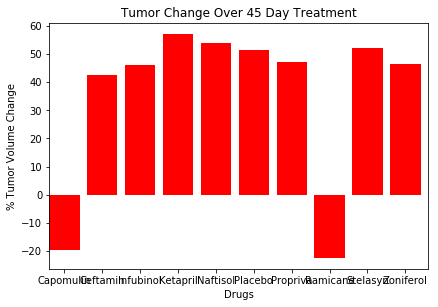

In [48]:
# Create a bar chart based upon the above data
plt.bar(x_axis, tumor_volume_change_percentage.values, color="r", align="edge")
# Create the ticks for our bar chart's x axis
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, tumor_volume_change_percentage.index)
# Set the limits of the x axis
plt.xlim(0, len(x_axis))
# make clean x labels
plt.tight_layout()
# Give the chart a title, x label, and y label
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
# Save an image of the chart and print it to the screen
plt.savefig("% Tumor Volume Change")
plt.show()

In [36]:
# Save an image of the chart and print it to the screen
plt.savefig("% Tumor Volume Change")
plt.show()

<Figure size 432x288 with 0 Axes>